# RANDOM FOREST REGRESSOR ALGORITHEM

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('Litecoin.csv')

df.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2014-09-17 00:00:00+00:00,5.08589,5.17077,4.96595,5.05855,3071840,0.0,0.0
1,2014-09-18 00:00:00+00:00,5.06543,5.06543,4.57996,4.68523,4569260,0.0,0.0
2,2014-09-19 00:00:00+00:00,4.68729,4.75582,4.25435,4.32777,3917450,0.0,0.0
3,2014-09-20 00:00:00+00:00,4.32920,4.61608,4.20219,4.28644,5490660,0.0,0.0
4,2014-09-21 00:00:00+00:00,4.26307,4.30013,4.15499,4.24592,2931220,0.0,0.0


In [3]:
df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'Dividends',
       'Stock Splits'],
      dtype='object')

In [4]:
del df['Stock Splits']
del df['Dividends']
del df['Date']

In [5]:
df=df.dropna()

In [6]:
df.head()

,Open,High,Low,Close,Volume
0,5.08589,5.17077,4.96595,5.05855,3071840
1,5.06543,5.06543,4.57996,4.68523,4569260
2,4.68729,4.75582,4.25435,4.32777,3917450
3,4.32920,4.61608,4.20219,4.28644,5490660
4,4.26307,4.30013,4.15499,4.24592,2931220


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3842 entries, 0 to 3841
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    3842 non-null   float64
 1   High    3842 non-null   float64
 2   Low     3842 non-null   float64
 3   Close   3842 non-null   float64
 4   Volume  3842 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 150.2 KB


In [8]:
x = df.drop(labels='Close', axis=1)
y = df.loc[:,'Close']

In [9]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
print("NUMBER OF TRAIN DATASET    : ", len(x_train))
print("NUMBER OF TEST DATASET      : ", len(x_test))
print("TOTAL NUMBER OF DATASET    : ", len(x_train)+len(x_test))

NUMBER OF TRAIN DATASET    :  3073
NUMBER OF TEST DATASET      :  769
TOTAL NUMBER OF DATASET    :  3842


In [10]:
print("NUMBER OF TRAIN DATASET    : ", len(y_train))
print("NUMBER OF TEST DATASET      : ", len(y_test))
print("TOTAL NUMBER OF DATASET    : ", len(y_train)+len(y_test))

NUMBER OF TRAIN DATASET    :  3073
NUMBER OF TEST DATASET      :  769
TOTAL NUMBER OF DATASET    :  3842


In [11]:
from sklearn.ensemble import RandomForestRegressor

In [12]:
RFR = RandomForestRegressor()
RFR.fit(x_train,y_train)

RandomForestRegressor()

In [13]:
predicted = RFR.predict(x_test)

In [14]:
from sklearn.metrics import rand_score
RS = rand_score(y_test, predicted)
print("MEAN RAND SCOORE OF RANDOM FOREST REGRESSOR",RS*100)

MEAN RAND SCOORE OF RANDOM FOREST REGRESSOR 99.99932271348071


In [15]:
from sklearn.metrics import r2_score
R2 = r2_score(y_test, predicted)
print("MEAN R2 SCOORE OF RANDOM FOREST REGRESSOR",R2*100)

MEAN R2 SCOORE OF RANDOM FOREST REGRESSOR 99.6844491354873


In [16]:
from sklearn.metrics import mean_squared_error
MSE = mean_squared_error(y_test, predicted)
print("MEAN SQUARE ERROR OF RANDOM FOREST REGRESSOR",MSE)

MEAN SQUARE ERROR OF RANDOM FOREST REGRESSOR 11.756567300877697


In [17]:
from sklearn.metrics import mean_squared_error
RMSE = mean_squared_error(y_test, predicted, squared=False)
print(" ROOT MEAN SQUARE ERROR OF RANDOM FOREST REGRESSOR",RMSE)

 ROOT MEAN SQUARE ERROR OF RANDOM FOREST REGRESSOR 3.4287851056719343


In [18]:
from sklearn.metrics import mean_absolute_error
MAE = mean_absolute_error(y_test, predicted)
print("MEAN ABSOLUTE ERROR OF RANDOM FOREST REGRESSOR",MAE)

MEAN ABSOLUTE ERROR OF RANDOM FOREST REGRESSOR 1.356249981163692


In [19]:
from sklearn.metrics import explained_variance_score
EVS = explained_variance_score(y_test, predicted)
print("EXPLAINED VARIANCE SCORE OF RANDOM FOREST REGRESSOR",EVS)

EXPLAINED VARIANCE SCORE OF RANDOM FOREST REGRESSOR 0.9968447461880461


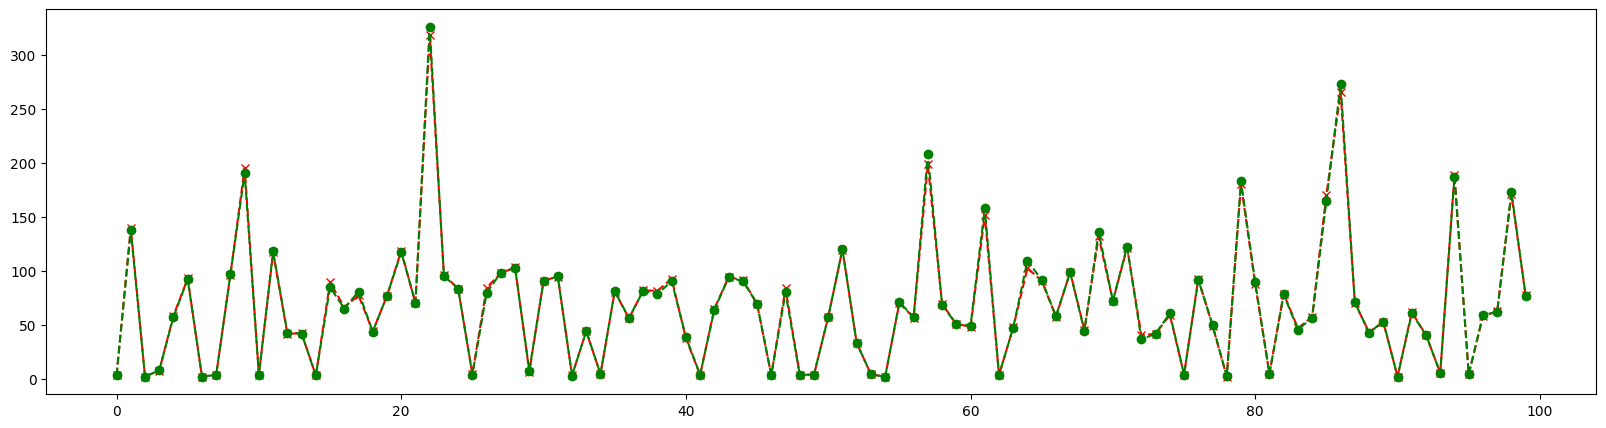

In [20]:
import matplotlib.pyplot as plt
df2 = pd.DataFrame()
df2["y_test"] = y_test
df2["predicted"] = predicted
df2.reset_index(inplace=True)
plt.figure(figsize=(20, 5))
plt.plot(df2["predicted"][:100], marker='x', linestyle='dashed', color='red')
plt.plot(df2["y_test"][:100],  marker='o', linestyle='dashed', color='green')
plt.show()

In [21]:
import joblib
joblib.dump(RFR, 'LITECOIN2.pkl')

['LITECOIN2.pkl']

In [22]:
# import ydata_profiling as yp
# import pandas_profiling
# from pandas_profiling import ProfileReport
# from ydata_profiling.model import describe
# prof = ProfileReport(data)
# prof.to_file(output_file='bitcoin.html')